# Model Evaluation & Visualization

## Imports & Setup

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Directories
processed_data_dir = Path("..") / "processed_data"
models_dir = Path("..") / "models"

print("✔️ Libraries & Directories Ready!")


✔️ Libraries & Directories Ready!


## Load Data & Models

In [3]:
# Load datasets
train_data = pd.read_csv(processed_data_dir / "train.csv")
test_data = pd.read_csv(processed_data_dir / "test.csv")

# Load trained models
log_reg_model = joblib.load(models_dir / "logistic_regression_model.pkl")
svm_model = joblib.load(models_dir / "svm_model.pkl")

print("✔️ Data & Models Loaded Successfully!")
print(f"train_data shape: {train_data.shape}")
print(f"test_data shape: {test_data.shape}")


✔️ Data & Models Loaded Successfully!
train_data shape: (3415, 12)
test_data shape: (854, 12)


## Prepare Features & Labels

In [5]:
X_test = test_data.drop(columns=["loan_status"])
y_test = test_data["loan_status"]

print("✔️ Test Features & Labels Prepared")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


✔️ Test Features & Labels Prepared
X_test shape: (854, 11)
y_test shape: (854,)


## Logistic Regression Evaluation

In [7]:
# Predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# Metrics (as percentages)
acc_log = accuracy_score(y_test, y_pred_log_reg) * 100
prec_log = precision_score(y_test, y_pred_log_reg) * 100
rec_log = recall_score(y_test, y_pred_log_reg) * 100
f1_log = f1_score(y_test, y_pred_log_reg) * 100

print("📊 Logistic Regression Evaluation")
print(f"Accuracy:  {acc_log:.2f}%")
print(f"Precision: {prec_log:.2f}%")
print(f"Recall:    {rec_log:.2f}%")
print(f"F1-Score:  {f1_log:.2f}%")


📊 Logistic Regression Evaluation
Accuracy:  91.33%
Precision: 92.08%
Recall:    94.16%
F1-Score:  93.11%


## SVM Evaluation

In [8]:
# Predictions
y_pred_svm = svm_model.predict(X_test)

# Metrics (as percentages)
acc_svm = accuracy_score(y_test, y_pred_svm) * 100
prec_svm = precision_score(y_test, y_pred_svm) * 100
rec_svm = recall_score(y_test, y_pred_svm) * 100
f1_svm = f1_score(y_test, y_pred_svm) * 100

print("📊 SVM Evaluation")
print(f"Accuracy:  {acc_svm:.2f}%")
print(f"Precision: {prec_svm:.2f}%")
print(f"Recall:    {rec_svm:.2f}%")
print(f"F1-Score:  {f1_svm:.2f}%")


📊 SVM Evaluation
Accuracy:  92.27%
Precision: 93.46%
Recall:    94.16%
F1-Score:  93.81%


## Comparison Table

In [9]:
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM"],
    "Accuracy (%)": [acc_log, acc_svm],
    "Precision (%)": [prec_log, prec_svm],
    "Recall (%)": [rec_log, rec_svm],
    "F1-Score (%)": [f1_log, f1_svm]
})

print("📊 Model Comparison")
display(results_df)


📊 Model Comparison


,Model,Accuracy (%),Precision (%),Recall (%),F1-Score (%)
0,Logistic Regression,91.334895,92.081031,94.161959,93.10987
1,SVM,92.271663,93.457944,94.161959,93.80863


## Confusion Matrices

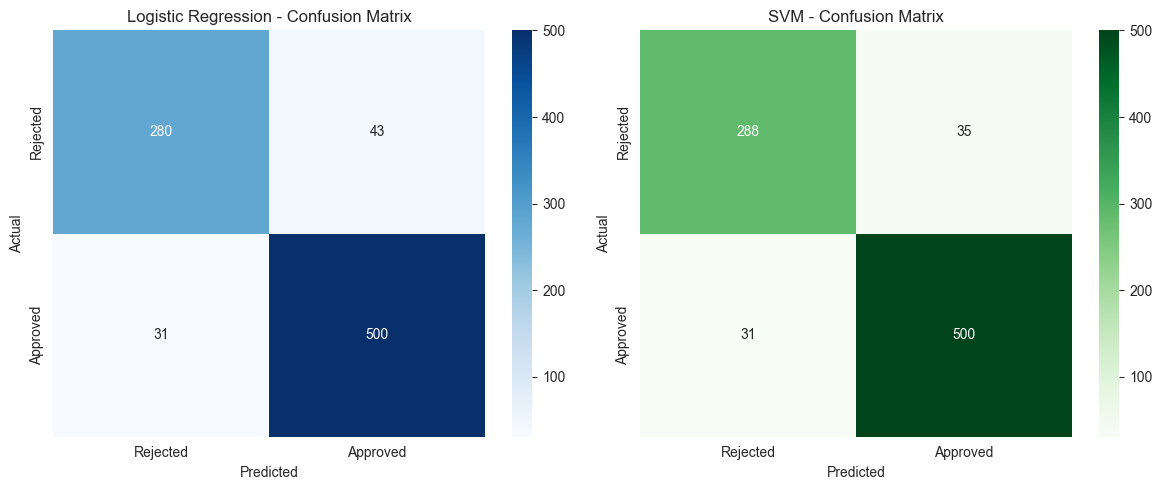

In [14]:
# Compute confusion matrices (counts)
cm_log = confusion_matrix(y_test, y_pred_log_reg)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
axes[0].set_title("Logistic Regression - Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# SVM Confusion Matrix
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens", ax=axes[1],
            xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
axes[1].set_title("SVM - Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


## ROC Curves

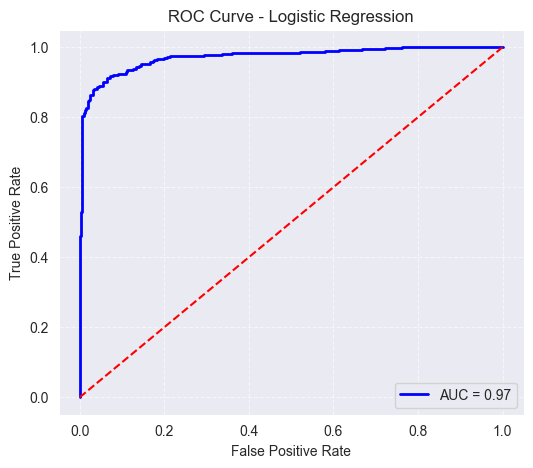

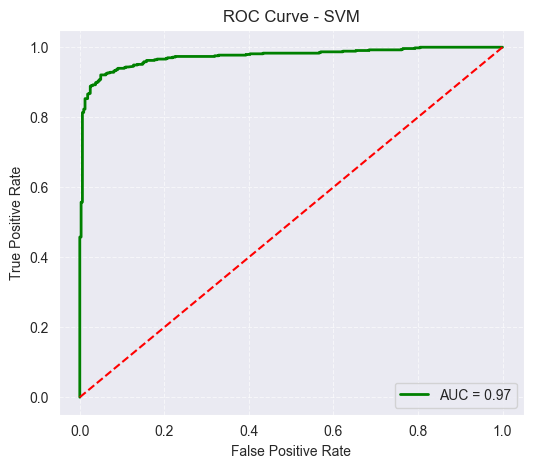

In [20]:
# Logistic Regression probabilities
y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log = roc_auc_score(y_test, y_prob_log_reg)

# Plot Logistic Regression ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, color="blue", lw=2, label=f"AUC = {roc_auc_log:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# SVM probabilities
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot SVM ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_svm, tpr_svm, color="green", lw=2, label=f"AUC = {roc_auc_svm:.2f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.title("ROC Curve - SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## Precision & Recall Curves

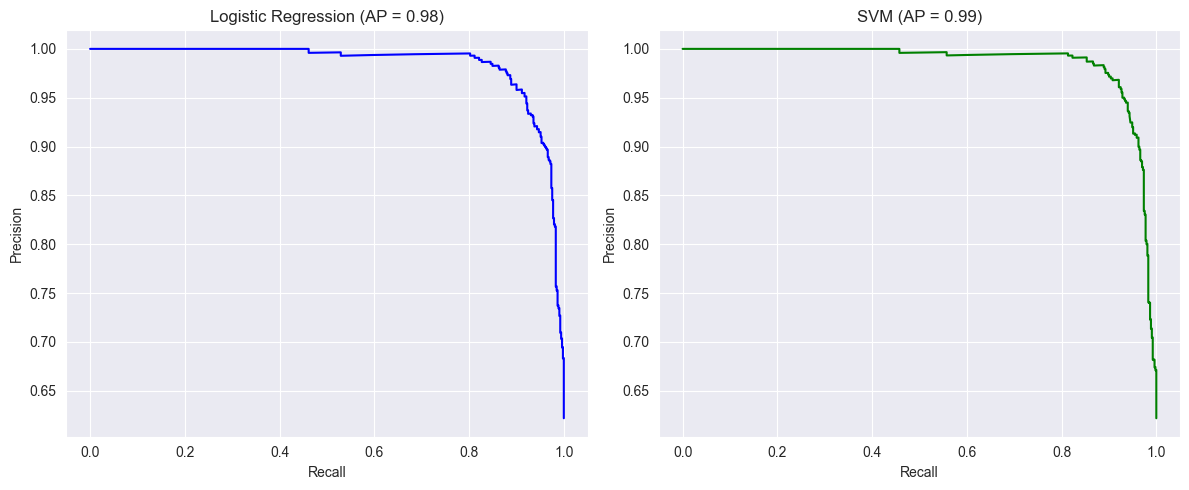

In [21]:
# Logistic Regression Precision-Recall
prec_log, rec_log, _ = precision_recall_curve(y_test, y_prob_log_reg)
ap_log = average_precision_score(y_test, y_prob_log_reg)

# SVM Precision-Recall
prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_prob_svm)
ap_svm = average_precision_score(y_test, y_prob_svm)

# Plot side-by-side Precision-Recall curves
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression PR Curve
axes[0].plot(rec_log, prec_log, color="blue")
axes[0].set_title(f"Logistic Regression (AP = {ap_log:.2f})")
axes[0].set_xlabel("Recall")
axes[0].set_ylabel("Precision")
axes[0].grid(True)

# SVM PR Curve
axes[1].plot(rec_svm, prec_svm, color="green")
axes[1].set_title(f"SVM (AP = {ap_svm:.2f})")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].grid(True)

plt.tight_layout()
plt.show()
